In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Introduction

In this project, by using data mining and machine learning methods, we tried to design a system to predict diabetes.
In the aforementioned dataset, we have used the indicators Gender, Age, Race, Education, Marital Status,Occupation, Weight ,Height ,BMI ,Systolic blood pressure, Diastolic blood pressure, Direct cholesterol, Total cholesterol and Physical activity to learn our model.


Dataset from : https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

# Starting (Getting data &  Normalization‌)

First, we call the libraries we need.
We use pandas, numpy, sklearn, matplotlib and seborn libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import copy


Some warnings cause clutter in our environment that we ignore them.

In [2]:
import warnings
warnings.filterwarnings('ignore')

Then we read our data with pandas structure.

In [3]:
dataset1 = pd.read_csv('NHANES.csv')
#dataset1 = pd.read_csv('/content/drive/MyDrive/2023/NHANES.csv')



One of the ways to reduce the data dimensions and clean the data is to remove the columns that we do not need:

**Data cleaning and dimensionality reduction**

In [4]:

#We randomly select the data.
#dataset2=dataset1.drop(dataset1.index[5000:10001])
dataset2=dataset1.sample(n = 10000)

#Here, we are going to delete the columns that we don't need.
dataset3=dataset2[["Gender",'Age','Race1','Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive','Diabetes']]

#Now we set the main dataset equal to the values we want.
dataset=copy.deepcopy(dataset3)

dataset.head()

Gender  Age  Race1     Education MaritalStatus        Work  Weight  Height  \
0    male   34  White   High School       Married  NotWorking    87.4   164.7   
1    male   34  White   High School       Married  NotWorking    87.4   164.7   
2    male   34  White   High School       Married  NotWorking    87.4   164.7   
3    male    4  Other           NaN           NaN         NaN    17.0   105.4   
4  female   49  White  Some College   LivePartner  NotWorking    86.7   168.4   

     BMI  BPSysAve  BPDiaAve  DirectChol  TotChol PhysActive Diabetes  
0  32.22     113.0      85.0        1.29     3.49         No       No  
1  32.22     113.0      85.0        1.29     3.49         No       No  
2  32.22     113.0      85.0        1.29     3.49         No       No  
3  15.30       NaN       NaN         NaN      NaN        NaN       No  
4  30.57     112.0      75.0        1.16     6.70         No       No

In [5]:
# Data Dimensions
dataset.shape

(10000, 15)

**Check the data structure**

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Race1          10000 non-null  object 
 3   Education      7221 non-null   object 
 4   MaritalStatus  7231 non-null   object 
 5   Work           7771 non-null   object 
 6   Weight         9922 non-null   float64
 7   Height         9647 non-null   float64
 8   BMI            9634 non-null   float64
 9   BPSysAve       8551 non-null   float64
 10  BPDiaAve       8551 non-null   float64
 11  DirectChol     8474 non-null   float64
 12  TotChol        8474 non-null   float64
 13  PhysActive     8326 non-null   object 
 14  Diabetes       9858 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


Here we see that some of our records have undefined values. We have different ways to standardize here. As a solution, we can completely remove those rows so that the data we want to use for various purposes is standardized Or we can replace them with mean or median.

We give a brief overview of the structure of our data set:

In [7]:
dataset.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2779
MaritalStatus    2769
Work             2229
Weight             78
Height            353
BMI               366
BPSysAve         1449
BPDiaAve         1449
DirectChol       1526
TotChol          1526
PhysActive       1674
Diabetes          142
dtype: int64

In [8]:
dataset.describe().T

count        mean        std    min     25%     50%     75%  \
Age         10000.0   36.742100  22.397566   0.00   17.00   36.00   54.00   
Weight       9922.0   70.981798  29.125357   2.80   56.10   72.70   88.90   
Height       9647.0  161.877838  20.186567  83.60  156.80  166.00  174.50   
BMI          9634.0   26.660136   7.376579  12.88   21.58   25.98   30.89   
BPSysAve     8551.0  118.154953  17.248170  76.00  106.00  116.00  127.00   
BPDiaAve     8551.0   67.480061  14.354804   0.00   61.00   69.00   76.00   
DirectChol   8474.0    1.364865   0.399258   0.39    1.09    1.29    1.58   
TotChol      8474.0    4.879220   1.075583   1.53    4.11    4.78    5.53   

               max  
Age          80.00  
Weight      230.70  
Height      200.40  
BMI          81.25  
BPSysAve    226.00  
BPDiaAve    116.00  
DirectChol    4.03  
TotChol      13.65

According to what I had read, in this model of projects, deleting data is one of the worst things. Then I use the average value.

Of course, we should know that NaN values in the Diabetes column are not useful for us. Because this is our dependent variable. So we delete the rows in which diabetes has no value.

**Replace undefined values**

In [9]:
dataset_new=dataset
dataset_new = dataset_new.dropna(subset=['Diabetes'])



We also consider that our data has zero values in some columns, which we consider as undefined.

In [10]:
dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']] = dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']].replace(0, np.NaN) 

#Now we count undefined values again
dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2639
MaritalStatus    2629
Work             2089
Weight             78
Height            216
BMI               229
BPSysAve         1312
BPDiaAve         1382
DirectChol       1389
TotChol          1389
PhysActive       1537
Diabetes            0
dtype: int64

Now we replace other columns with undefined values with the average values of those columns.

In [11]:
dataset_new["Weight"].fillna(dataset_new["Weight"].mean(), inplace = True)
dataset_new["Height"].fillna(dataset_new["Height"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)
dataset_new["BPSysAve"].fillna(dataset_new["BPSysAve"].mean(), inplace = True)
dataset_new["BPDiaAve"].fillna(dataset_new["BPDiaAve"].mean(), inplace = True)
dataset_new["DirectChol"].fillna(dataset_new["DirectChol"].mean(), inplace = True)
dataset_new["TotChol"].fillna(dataset_new["TotChol"].mean(), inplace = True)

dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        2639
MaritalStatus    2629
Work             2089
Weight              0
Height              0
BMI                 0
BPSysAve            0
BPDiaAve            0
DirectChol          0
TotChol             0
PhysActive       1537
Diabetes            0
dtype: int64

We also use their mode for discrete values.

In [12]:
dataset_new["PhysActive"].fillna(dataset_new["PhysActive"].mode()[0], inplace = True)
dataset_new["Education"].fillna(dataset_new["Education"].mode()[0], inplace = True)
dataset_new["MaritalStatus"].fillna(dataset_new["MaritalStatus"].mode()[0], inplace = True)
dataset_new["Work"].fillna(dataset_new["Work"].mode()[0], inplace = True)


dataset_new.isnull().sum()

Gender           0
Age              0
Race1            0
Education        0
MaritalStatus    0
Work             0
Weight           0
Height           0
BMI              0
BPSysAve         0
BPDiaAve         0
DirectChol       0
TotChol          0
PhysActive       0
Diabetes         0
dtype: int64

In [13]:
dataset=copy.deepcopy(dataset_new)

We have done the data cleaning step successfully.

# Data Visualization

In this section, we want to illustrate our data for a more detailed examination. We use Matplotlib and Seaborn libraries for this.
Here we ask some questions and find the answer with different diagrams.

What is the difference between the race of people who are diabetes positive and those who are diabetes negative?

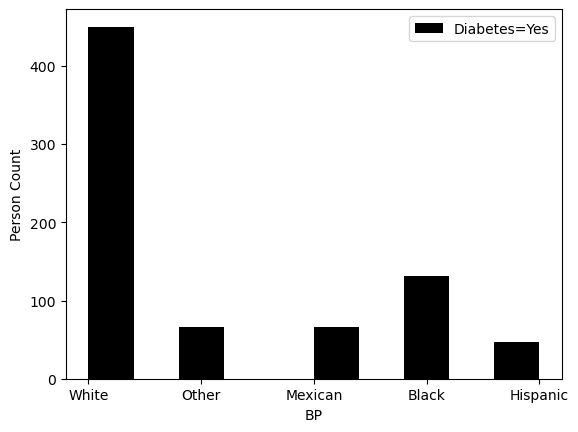

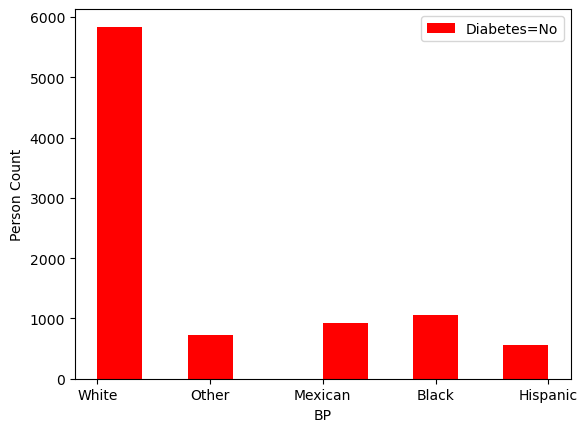

In [15]:
import matplotlib.pyplot as plt

YesDia = dataset_new['Diabetes'].values == 'Yes'
NoDia = dataset_new['Diabetes'].values == 'No'
YesDia=dataset_new[YesDia]
NoDia=dataset_new[NoDia]
 
Race1 = YesDia['Race1'].tolist()
Race0 = NoDia['Race1'].tolist()

plt.hist([Race1], color=[
         'Black'], label=['Diabetes=Yes'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

plt.hist([Race0], color=[
         'Red'], label=['Diabetes=No'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

Do most diabetics have little physical activity?

<Axes: xlabel='PhysActive', ylabel='count'>

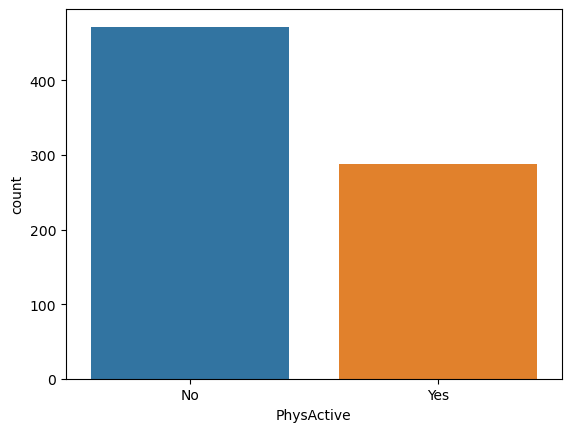

In [16]:
sns.countplot(x = 'PhysActive',data = YesDia)


<Axes: xlabel='PhysActive', ylabel='count'>

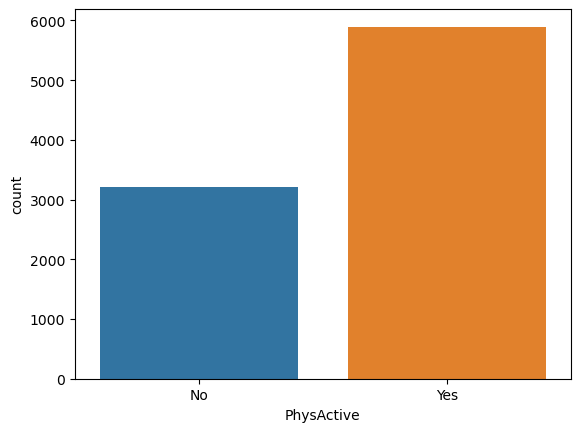

In [17]:
sns.countplot(x = 'PhysActive',data = NoDia)

**Lineplot**

<Axes: xlabel='Age', ylabel='Diabetes'>

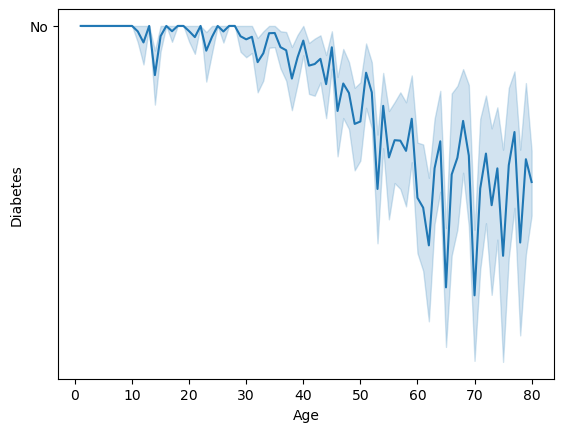

In [18]:
sns.lineplot(x="Age", y="Diabetes", data=dataset_new)

**Scatter matrix**

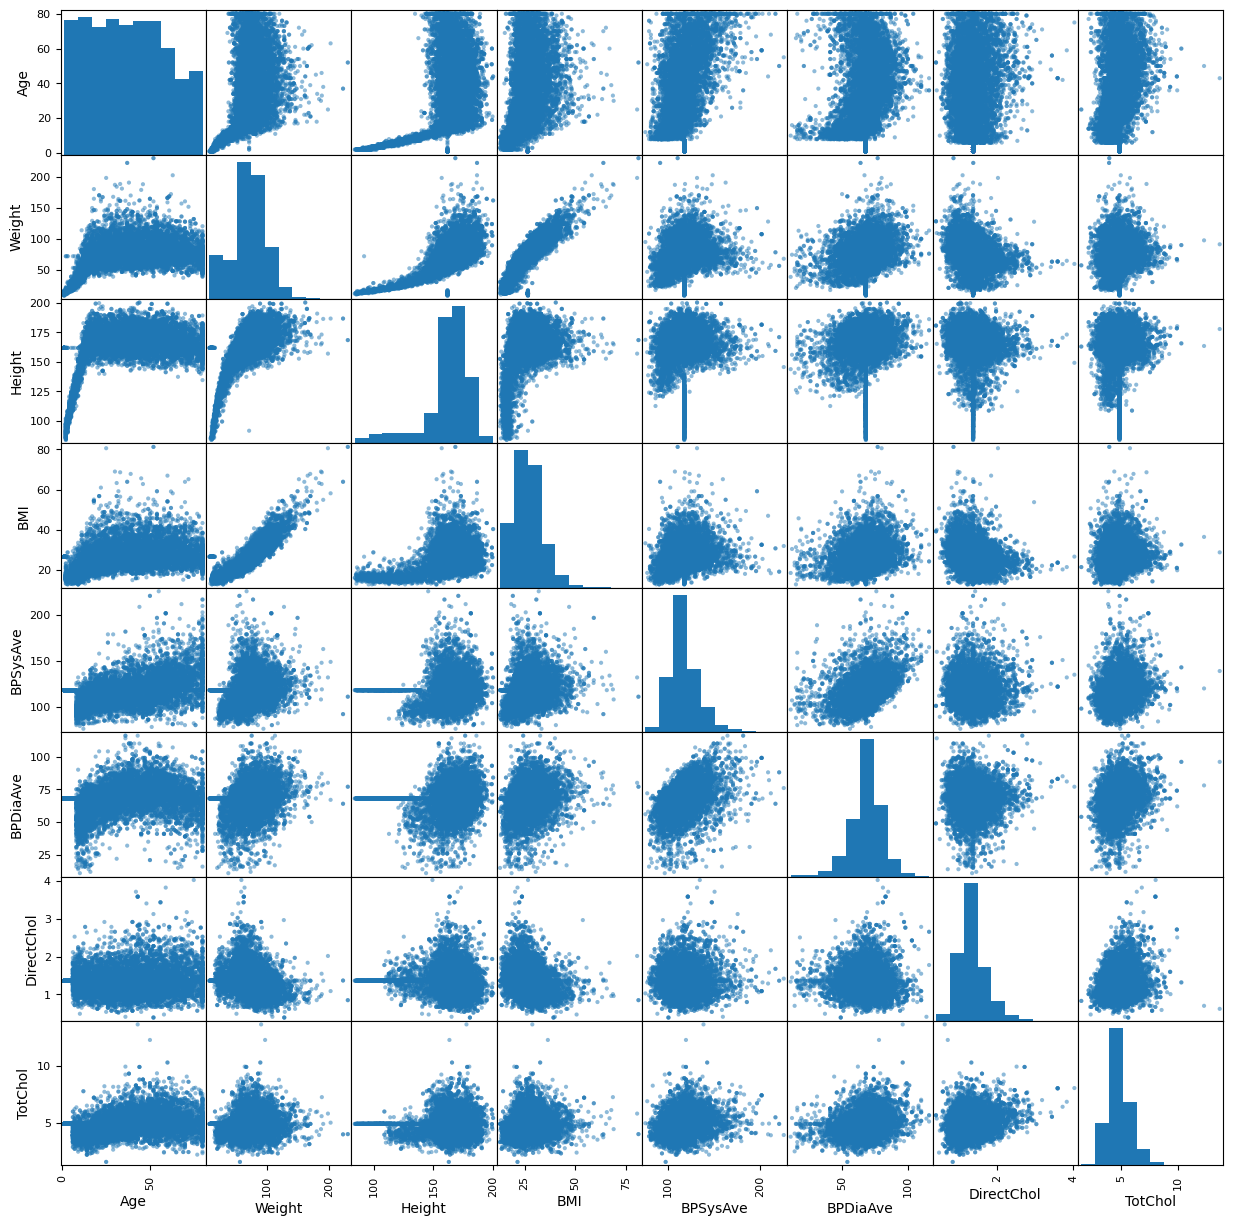

In [19]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(dataset , figsize=(15, 15))
plt.show()

**Distribution plots**

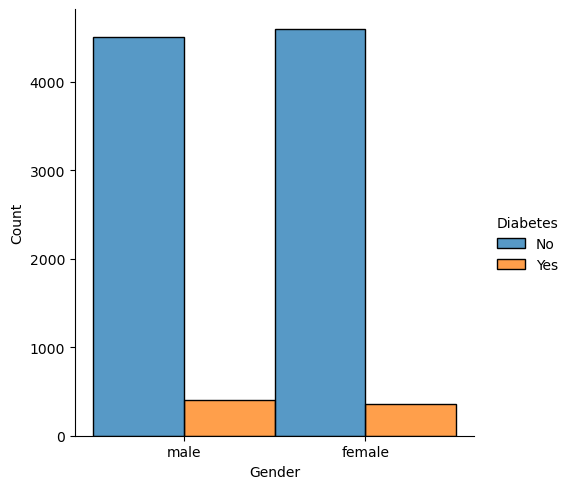

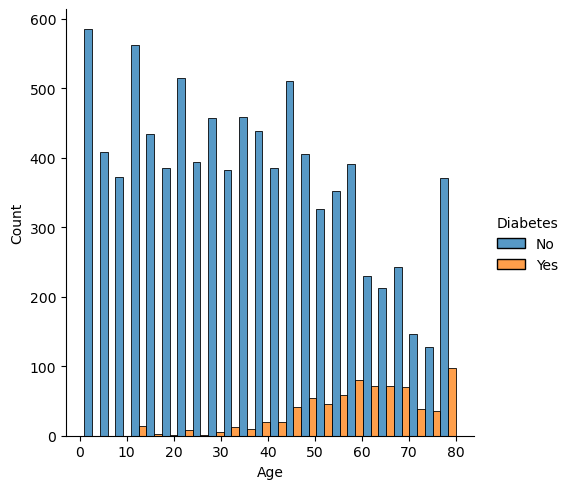

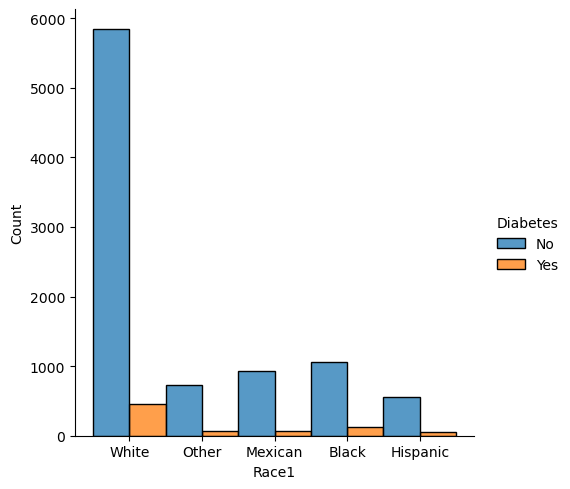

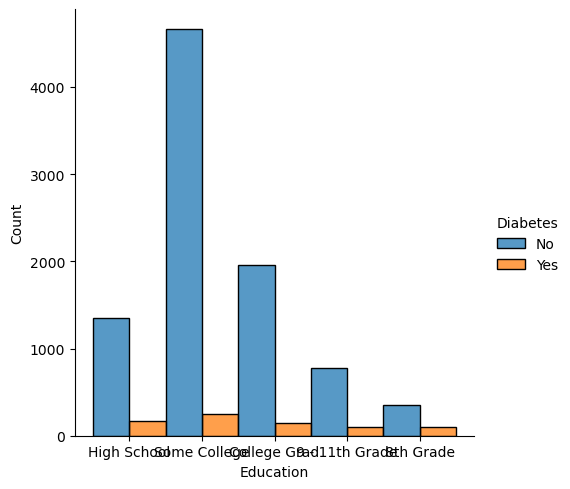

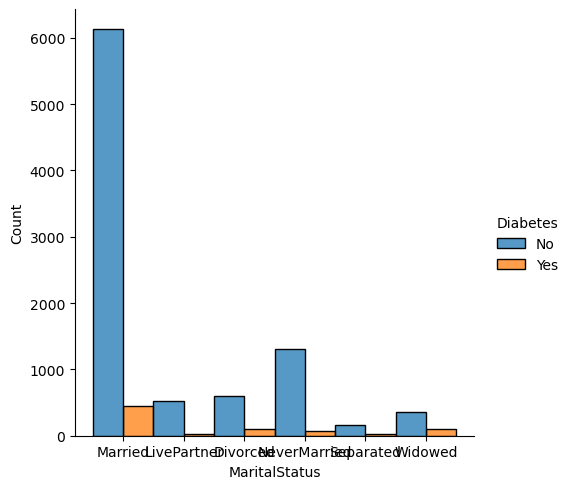

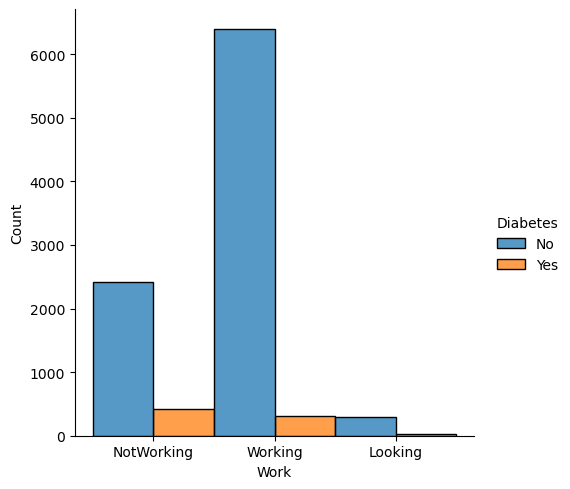

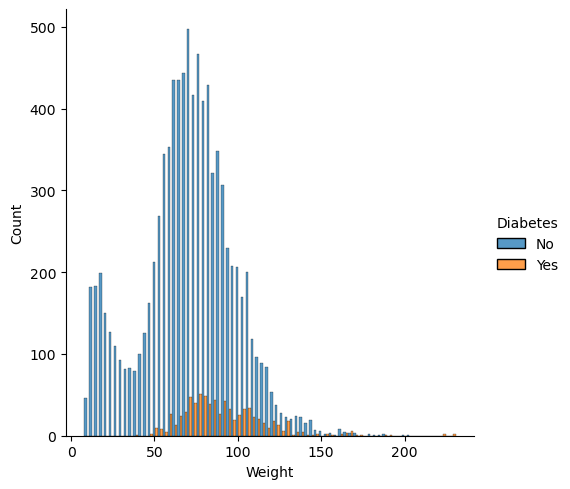

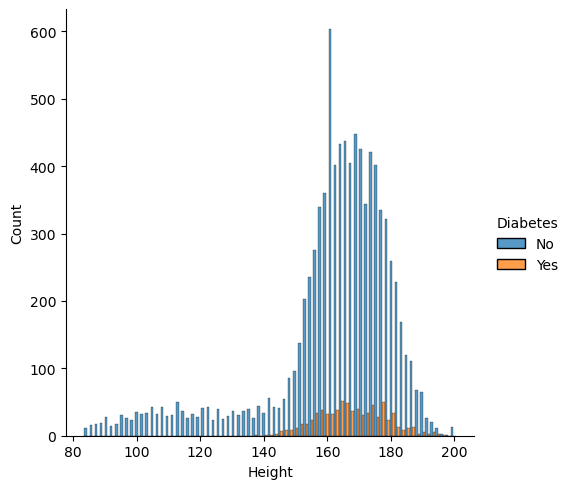

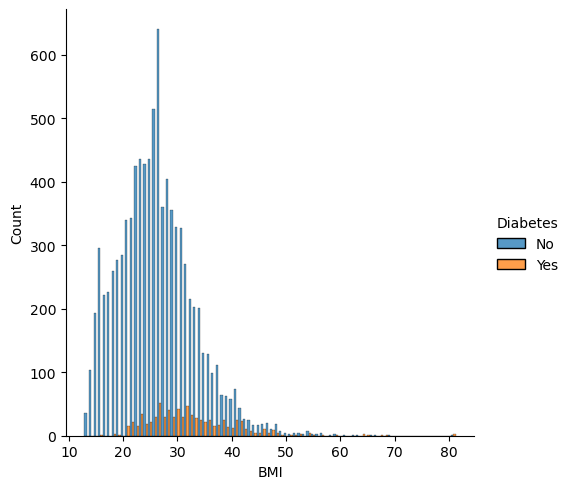

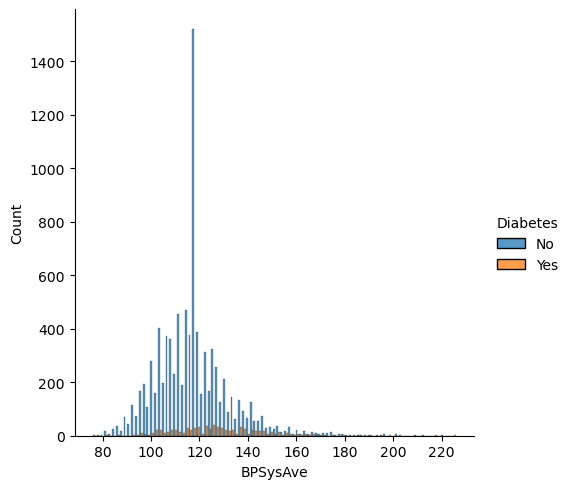

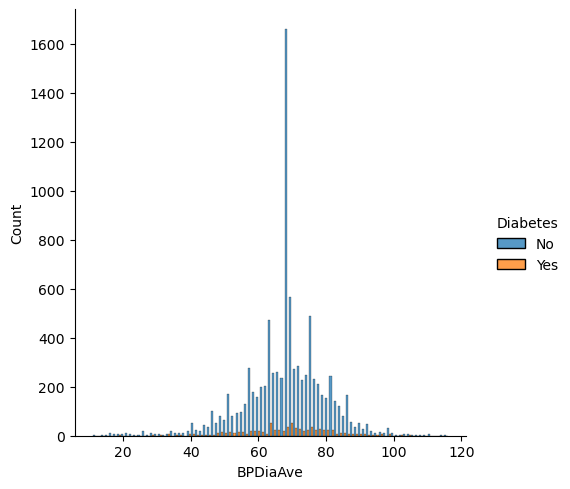

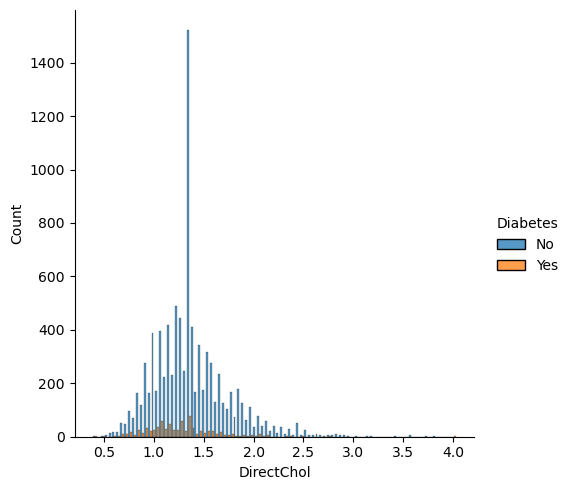

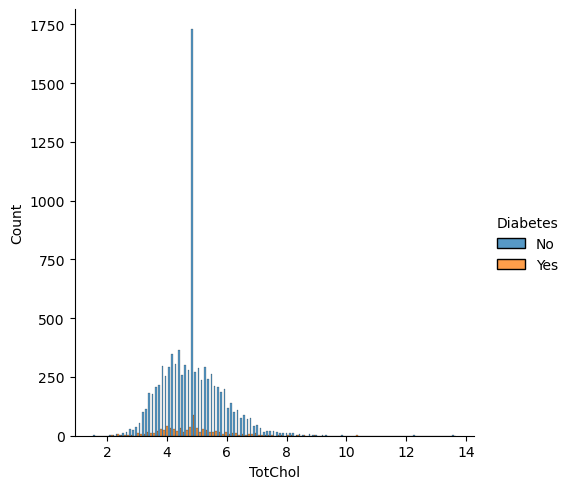

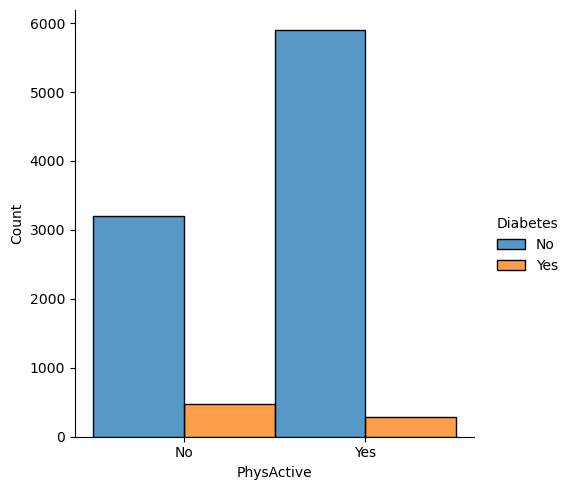

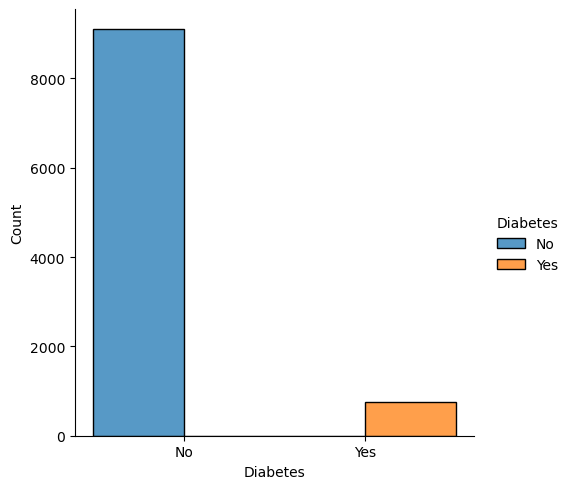

In [20]:
for i in dataset_new.columns:
    sns.displot(dataset, x=i,multiple="dodge",hue="Diabetes")
    

**Pair plot**

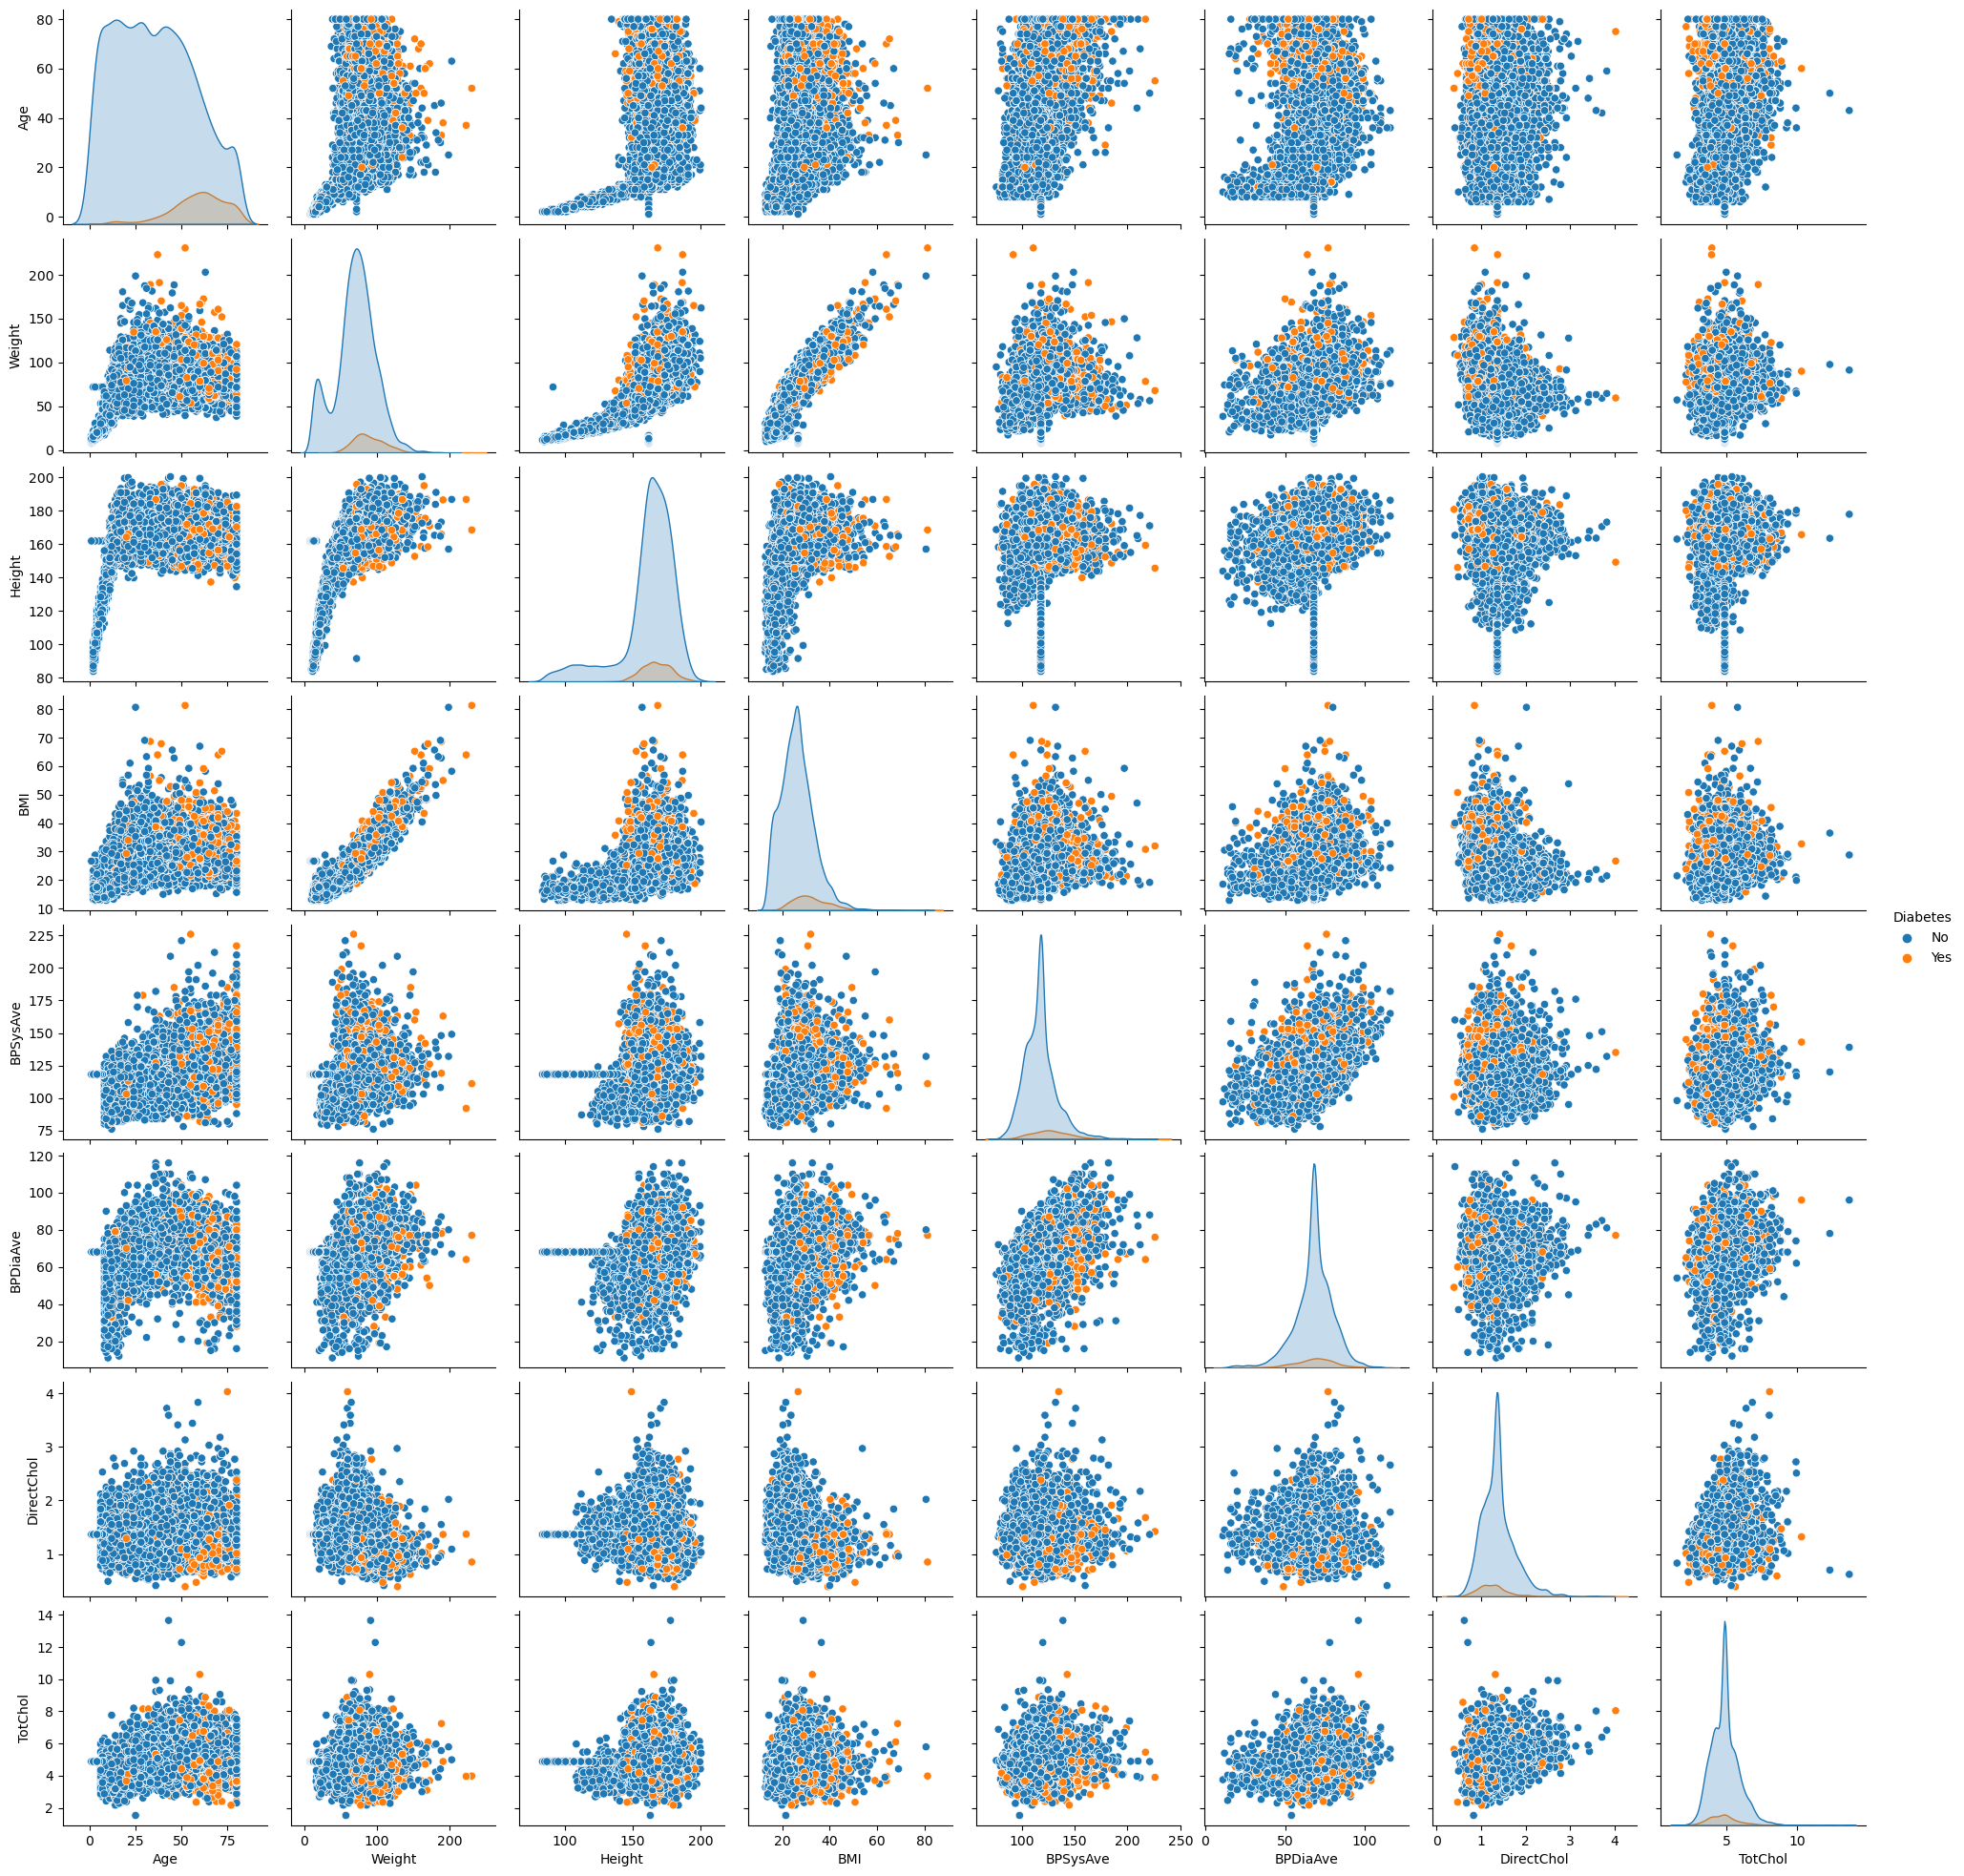

In [21]:
sns.pairplot(data = dataset, hue = 'Diabetes')
plt.show()

**Plot correlation matrix (Clustermap)**

In [22]:

import matplotlib.pyplot as plt
import numpy as np
 

#Converting dataset_new into a panda dataframe
df = dataset_new

corr = df.corr()

 #Displaying dataframe of correlation values
corr.style.background_gradient(cmap ='coolwarm')

# Algorithms

Here we process and standardize the data so that we can finally build different models with them.

**Dummy variable**

According to what we learned in the data mining course, in many models including logistic regression, we cannot have nominal discrete data. Dummy variables are a solution that can be effective to convert them into binary variables (by expanding the columns).



In [12]:

df3 = dataset_new.copy()
# These columns must be converted
df3 = pd.get_dummies(df3,columns = ['Gender', 'Race1','Education','MaritalStatus','Work','PhysActive','Diabetes'], drop_first = True)
print(df3.columns)
dataset_new=df3.copy()

Index(['Age', 'Weight', 'Height', 'BMI', 'BPSysAve', 'BPDiaAve', 'DirectChol',
       'TotChol', 'Gender_male', 'Race1_Hispanic', 'Race1_Mexican',
       'Race1_Other', 'Race1_White', 'Education_9 - 11th Grade',
       'Education_College Grad', 'Education_High School',
       'Education_Some College', 'MaritalStatus_LivePartner',
       'MaritalStatus_Married', 'MaritalStatus_NeverMarried',
       'MaritalStatus_Separated', 'MaritalStatus_Widowed', 'Work_NotWorking',
       'Work_Working', 'PhysActive_Yes', 'Diabetes_Yes'],
      dtype='object')


Now we see the result:

In [13]:
dataset_new.head()

Age  Weight  Height    BMI    BPSysAve   BPDiaAve  DirectChol   TotChol  \
0   34    87.4   164.7  32.22  113.000000  85.000000    1.290000  3.490000   
1   34    87.4   164.7  32.22  113.000000  85.000000    1.290000  3.490000   
2   34    87.4   164.7  32.22  113.000000  85.000000    1.290000  3.490000   
3    4    17.0   105.4  15.30  118.159724  68.044597    1.365029  4.878875   
4   49    86.7   168.4  30.57  112.000000  75.000000    1.160000  6.700000   

   Gender_male  Race1_Hispanic  ...  Education_Some College  \
0            1               0  ...                       0   
1            1               0  ...                       0   
2            1               0  ...                       0   
3            1               0  ...                       0   
4            0               0  ...                       1   

   MaritalStatus_LivePartner  MaritalStatus_Married  \
0                          0                      1   
1                          0                      1   
2                          0                      1   
3                          0                      0   
4                          1                      0   

   MaritalStatus_NeverMarried  MaritalStatus_Separated  MaritalStatus_Widowed  \
0                           0                        0                      0   
1                           0                        0                      0   
2                           0                        0                      0   
3                           0                        0                      0   
4                           0                        0                      0   

   Work_NotWorking  Work_Working  PhysActive_Yes  Diabetes_Yes  
0                1             0               0             0  
1                1             0               0             0  
2                1             0               0             0  
3                0             0               0             0  
4                1             0               0             0  

[5 rows x 26 columns]

**Preprocessing & Data Spliting**

This is one of the most important parts of our project. We must select the columns that we want to use as X and Y in the models. Then, according to the standards, 25% of the rows should randomly contain our test data, and the rest will be used for learning.

In [14]:
# Selecting X & Y
X = dataset_new.iloc[:, :-1].values
Y = dataset_new.iloc[:, -1].values



In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.25, random_state = 0)


Most machine learning algorithms use Euclidean distance for their estimates. For this reason, if some samples have too much or too little value, the accuracy of the modeling will decrease. Data scaling is used to solve this problem.


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

This step was the last step of data preprocessing. Now we can inject our data into machine learning algorithms.

In [17]:
# Checking dimensions
print("XTrain shape:", XTrain.shape)
print("XTest shape:", XTest.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

XTrain shape: (7393, 25)
XTest shape: (2465, 25)
YTrain shape: (7393,)
YTest shape: (2465,)


**Cross validator**
.
.
.
.


We write two functions that calculate the amount of acc and auc for us and enter it into a list.

In [20]:
#Importing required libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def Kfold_modulation(input_model):

    #Implementing cross validation
    k_list = [2,5,10]
    acc_list=[]

    for k in k_list:

        kf = RepeatedKFold(n_splits=k, n_repeats=20, random_state=None)
        #kf = KFold(n_splits=k,shuffle=False, random_state=None)
        model = input_model
        
        acc_score = []

        scores = cross_val_score(model, X, Y, scoring='accuracy', cv=kf)    
        avg_acc_score = mean(scores)
        #print(acc_score)
        #print(sum(acc_score))
        #print(n)

      #  print('Avg acc : avg_acc_score)
        acc_list.append(avg_acc_score)
    return acc_list 


In [21]:
from sklearn.model_selection import RepeatedKFold

def Kfold_modulation2(input_model):

     #Implementing cross validation
     k_list = [2, 5, 10]
     num_repeats = 20
     auc_list=[]

     for k in k_list:
         kf = RepeatedKFold(n_splits=k, n_repeats=num_repeats)

         mean_score = cross_val_score(input_model, X, Y, scoring="roc_auc", cv=kf).mean()

         auc_list.append(mean_score)
    
     return auc_list

We create logistic regression and random tree forest models:

**Logistic regresion**

In [22]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_acc=Kfold_modulation(logreg)
logreg_auc=Kfold_modulation2(logreg)
logreg.fit(XTrain, YTrain)
logreg_pred=logreg.predict(XTest)
#print(logreg_acc)



**Random forest**

In [ ]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor_acc=Kfold_modulation(ranfor)
ranfor_auc=Kfold_modulation2(ranfor)
ranfor.fit(XTrain, YTrain)


#The ranfor_pred value is later used to draw the confusion matrix.
ranfor_pred=ranfor.predict(XTest)


Decision Trees

In [ ]:
# Decision Trees Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DecTree = DecisionTreeClassifier()
DecTree_acc=Kfold_modulation(DecTree)
DecTree_auc=Kfold_modulation2(DecTree)
DecTree.fit(XTrain, YTrain)



#This part of the code was commented because it was time-consuming to draw the created tree for us.
#DecTree_auc=Kfold_modulation2(DecTree)
#print(DecTree_auc)
#text_representation = tree.export_text(DecTree)
#print(text_representation)

#DecTree_pred=DecTree.predict(XTest)

'''
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)
tree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )
'''

'\nfig = plt.figure(figsize=(250,200))\n_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)\ntree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )\n'

AdaBoost:

In [ ]:
#  AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost_acc=Kfold_modulation(AdaBoost)
AdaBoost_auc=Kfold_modulation2(AdaBoost)
AdaBoost.fit(XTrain, YTrain)

#The AdaBoost_pred value is later used to draw the confusion matrix
AdaBoost_pred=AdaBoost.predict(XTest)

Naive Bayes:

In [ ]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_acc=Kfold_modulation(nb)
nb_auc=Kfold_modulation2(nb)
nb.fit(XTrain, YTrain)

#The nb_pred value is later used to draw the confusion matrix
nb_pred=nb.predict(XTest)

# Show Scoring

In this section, we must evaluate how reliable our models and measure the error rate of the Predictors (by K-Folds):

In [ ]:
acc_list0=[logreg_acc,ranfor_acc,DecTree_acc,AdaBoost_acc,nb_acc]
acc_list=[]
for i in acc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    #for i in my_formatted_list:
        #list.append(int(float(i)*100))
    acc_list.append(my_formatted_list)

    
'''
print("Logistic Regression: " + str(acc_list[0]))
print("Random Forest: " + str(acc_list[1]))
print("DecisionTree: " + str(acc_list[2]))
print("AdaBoost: " + str(acc_list[3]))
print("Naive Bayes: " + str(acc_list[4]))
'''


auc_list0=[logreg_auc,ranfor_auc,DecTree_auc,AdaBoost_auc,nb_auc]
auc_list=[]
for i in auc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    auc_list.append(my_formatted_list)

print(auc_list)


[['0.8515', '0.8533', '0.8532'], ['0.9221', '0.9487', '0.9540'], ['0.7266', '0.7680', '0.7829'], ['0.8602', '0.8667', '0.8679'], ['0.8097', '0.8117', '0.8125']]


Creating ACC and AUC values for diffrent algorithms:

In [ ]:
bar=pd.DataFrame([acc_list[0],acc_list[1],acc_list[2],acc_list[3],acc_list[4]])
bar['algo'] = ['LR','RF','DT','AB','NB']
#bar.insert()=['logreg_acc','ranfor_acc','DecTree_acc','AdaBoost_acc','nb_acc']
bar.columns=['K2' , 'K5' , 'K10','Algorithm']

bar['K2']=bar['K2'].astype('float64')*100
bar['K5']=bar['K5'].astype('float64')*100
bar['K10']=bar['K10'].astype('float64')*100

print('ACC','\n',bar,'\n')



barauc=pd.DataFrame([auc_list[0],auc_list[1],auc_list[2],auc_list[3],auc_list[4]])
barauc['algo'] = ['LR','RF','DT','AB','NB']
#barauc.insert()=['logreg_auc','ranfor_auc','DecTree_auc','AdaBoost_auc','nb_auc']
barauc.columns=['K2' , 'K5' , 'K10','Algorithm']
barauc['K2']=barauc['K2'].astype('float64')*100
barauc['K5']=barauc['K5'].astype('float64')*100
barauc['K10']=barauc['K10'].astype('float64')*100
print('\n','AUC','\n',barauc)

ACC 
       K2     K5    K10 Algorithm
0  92.38  92.41  92.42        LR
1  94.62  95.48  95.70        RF
2  91.96  93.28  93.54        DT
3  92.26  92.36  92.38        AB
4  83.40  83.47  83.45        NB 


 AUC 
       K2     K5    K10 Algorithm
0  85.15  85.33  85.32        LR
1  92.21  94.87  95.40        RF
2  72.66  76.80  78.29        DT
3  86.02  86.67  86.79        AB
4  80.97  81.17  81.25        NB


Drawing ACC and AUC graphs for different algorithms:

<Axes: title={'center': 'AUC'}, xlabel='Algorithm'>

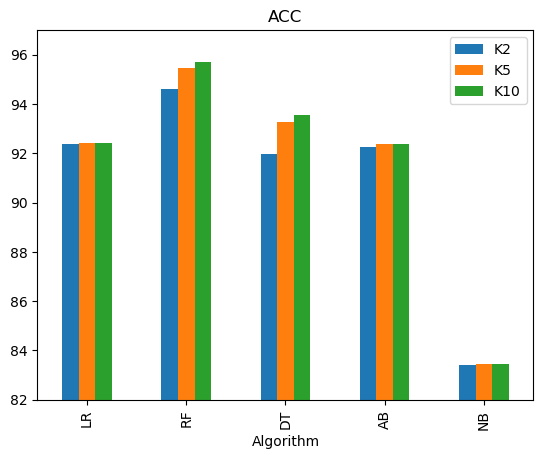

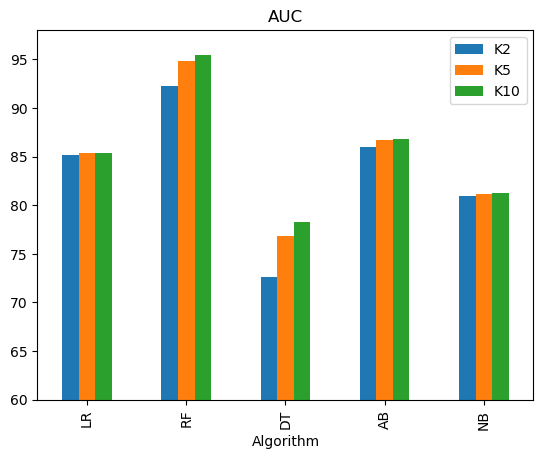

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
  
# create data

# view data

bar['K2'] = bar['K2'].astype('float64') 
bar['K5'] = bar['K5'].astype('float64') 
bar['K10'] = bar['K10'].astype('float64') 
# plot grouped bar chart
bar.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[82, 97],
        title='ACC')

barauc['K2'] = barauc['K2'].astype('float64') 
barauc['K5'] = barauc['K5'].astype('float64') 
barauc['K10'] = barauc['K10'].astype('float64') 
# plot grouped bar chart
barauc.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[60, 98],
        title='AUC')

Drawing ROC diagram for different folds:

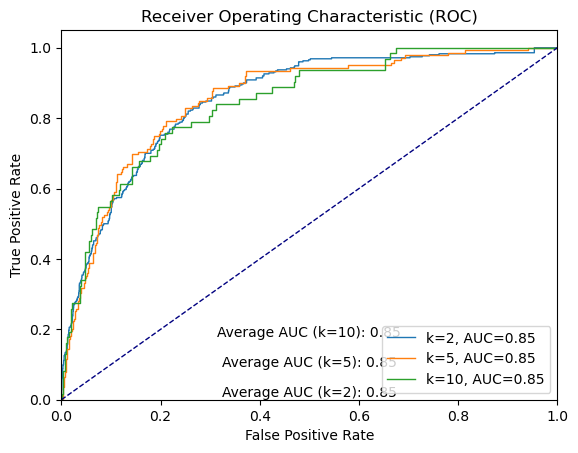

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RepeatedKFold

# Define the repeated k-fold cross-validation parameters
n_folds = [2, 5, 10]
n_repeats = 20

# Define the classifier
clf = logreg

# Initialize the mean AUC list for each k
mean_auc_list = []

# Perform repeated k-fold cross-validation for each k
for n_fold in n_folds:
    auc_list = []
    rskf = RepeatedKFold(n_splits=n_fold, n_repeats=n_repeats)

    # Perform cross-validation
    for train_index, test_index in rskf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        Y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        auc_val = auc(fpr, tpr)
        auc_list.append(auc_val)

    # Calculate the mean AUC and update mean AUC list
    mean_auc = np.mean(auc_list)
    mean_auc_list.append(mean_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, label=f'k={n_fold}, AUC={mean_auc:.2f}')

# Set plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Display average AUC values
plt.text(0.5, 0.02, f'Average AUC (k=2): {mean_auc_list[0]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.1, f'Average AUC (k=5): {mean_auc_list[1]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.18, f'Average AUC (k=10): {mean_auc_list[2]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.show()

Now we draw the correlation matrix for two random tree forest and logistic regression algorithms:

[[2257    5]
 [ 113   90]]


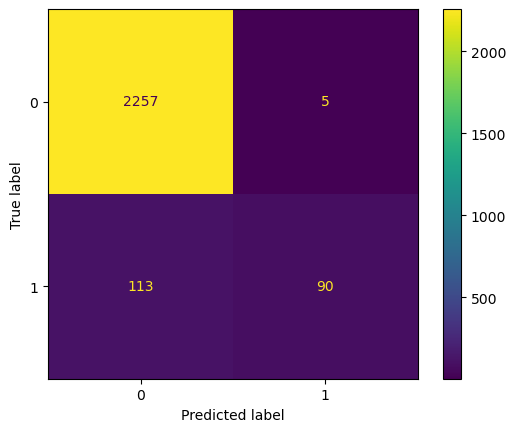

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#In the models, we put test data to make predictions for us.
    
YP_ranfor = ranfor.predict(XTest)

cm = confusion_matrix(YTest, YP_ranfor, labels=None)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Classification report (for main classification metrics) :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(YTest, YP_ranfor))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2262
           1       0.95      0.44      0.60       203

    accuracy                           0.95      2465
   macro avg       0.95      0.72      0.79      2465
weighted avg       0.95      0.95      0.94      2465



Logistic regression algorithms:

[[2243   19]
 [ 179   24]]


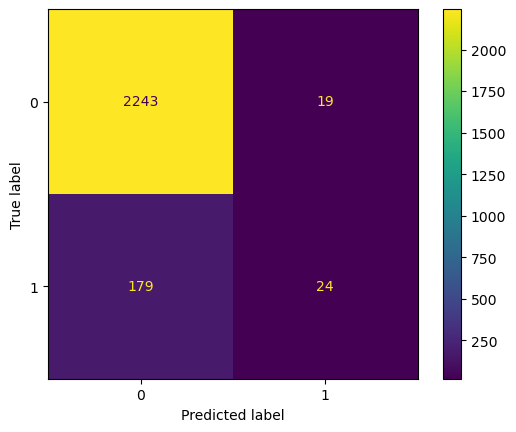

In [ ]:

cm2 = confusion_matrix(YTest, logreg_pred, labels=None)
print(cm2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

